<a href="https://colab.research.google.com/github/SAGARIKA-SHAH/Classification_Algorithms/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
%matplotlib inline
import itertools

**Importing the dataset**

In [2]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [5]:
df.shape
     

(400, 5)

In [6]:
df.head()
     

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
le=LabelEncoder()
df[['Gender']]=df[['Gender']].apply(le.fit_transform)
     

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [9]:
x=df[['Gender','Age' ,'EstimatedSalary']]
y=df['Purchased']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=17)

**Feature Scaling**

In [11]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)
     

**Fitting Decision Tree Classification to the Training set**

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=2)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [13]:
#checking best depth value(hyperparammeter)
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  dt = DecisionTreeClassifier(max_depth=i) #initialising the model
  dt.fit(x_train,y_train) # training the model
  trainacc=accuracy_score(y_train, dtc.predict(x_train))
  dt=DecisionTreeClassifier(max_depth=i)
  valAcc=cross_val_score(dtc, x_train, y_train, cv=10)
  print("K value  : " , i," Training Accuracy : ", trainacc, " Cross val score : ", np.mean(valAcc))

K value  :  1  Training Accuracy :  0.925  Cross val score :  0.9214285714285714
K value  :  2  Training Accuracy :  0.925  Cross val score :  0.9214285714285714
K value  :  3  Training Accuracy :  0.925  Cross val score :  0.9214285714285714
K value  :  4  Training Accuracy :  0.925  Cross val score :  0.9214285714285714
K value  :  5  Training Accuracy :  0.925  Cross val score :  0.9214285714285714
K value  :  6  Training Accuracy :  0.925  Cross val score :  0.9214285714285714
K value  :  7  Training Accuracy :  0.925  Cross val score :  0.9214285714285714
K value  :  8  Training Accuracy :  0.925  Cross val score :  0.9214285714285714
K value  :  9  Training Accuracy :  0.925  Cross val score :  0.9214285714285714
K value  :  10  Training Accuracy :  0.925  Cross val score :  0.9214285714285714
K value  :  20  Training Accuracy :  0.925  Cross val score :  0.9214285714285714
K value  :  50  Training Accuracy :  0.925  Cross val score :  0.9214285714285714


**Predicting the Test set results**

In [14]:
y_pred=dtc.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [15]:
ress=roc_auc_score(y_test, y_pred)
ress
    

0.9075738125802311

**Making the Confusion Matrix**

In [16]:
conf_mat=confusion_matrix(y_test, y_pred)
conf_mat

array([[69, 13],
       [ 1, 37]])

In [17]:
class_names = ["not_Purchased", "Purchased"]
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    name = None    
    fmt = 'd'
    thresh = cm.max() / 2
    # i and j tell us the coordinates of boxes
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0 and j == 0:
            name = "True Negatives"
        elif i == 0 and j == 1:
            name = "False Positives"
        elif i == 1 and j == 1:
            name = "True Positives"
        else:
            name = "False Negatives"
        plt.text(j, i, format(cm[i, j], fmt) + "\n" + name, horizontalalignment="center", 
                 fontsize=23, color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', labelpad=12)
    plt.xlabel('Predicted label', labelpad=12)
    plt.title(title, y=1.02)
    plt.tight_layout()

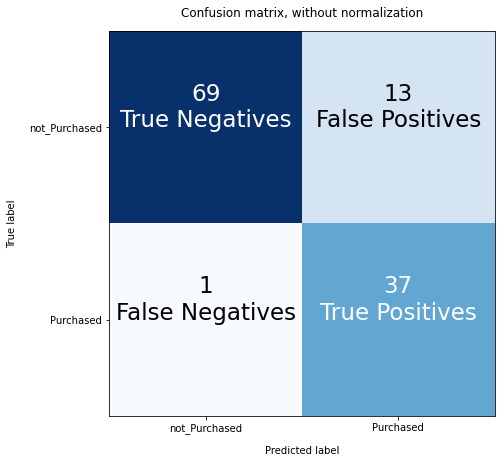

In [18]:
plt.figure(figsize=(7, 7))
plt.grid(False)
plot_confusion_matrix(conf_mat, classes=class_names, title='Confusion matrix, without normalization')

**Visualising the Training set results**

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=6)# since we found 6 max depth has best crossval
dtc.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=6)

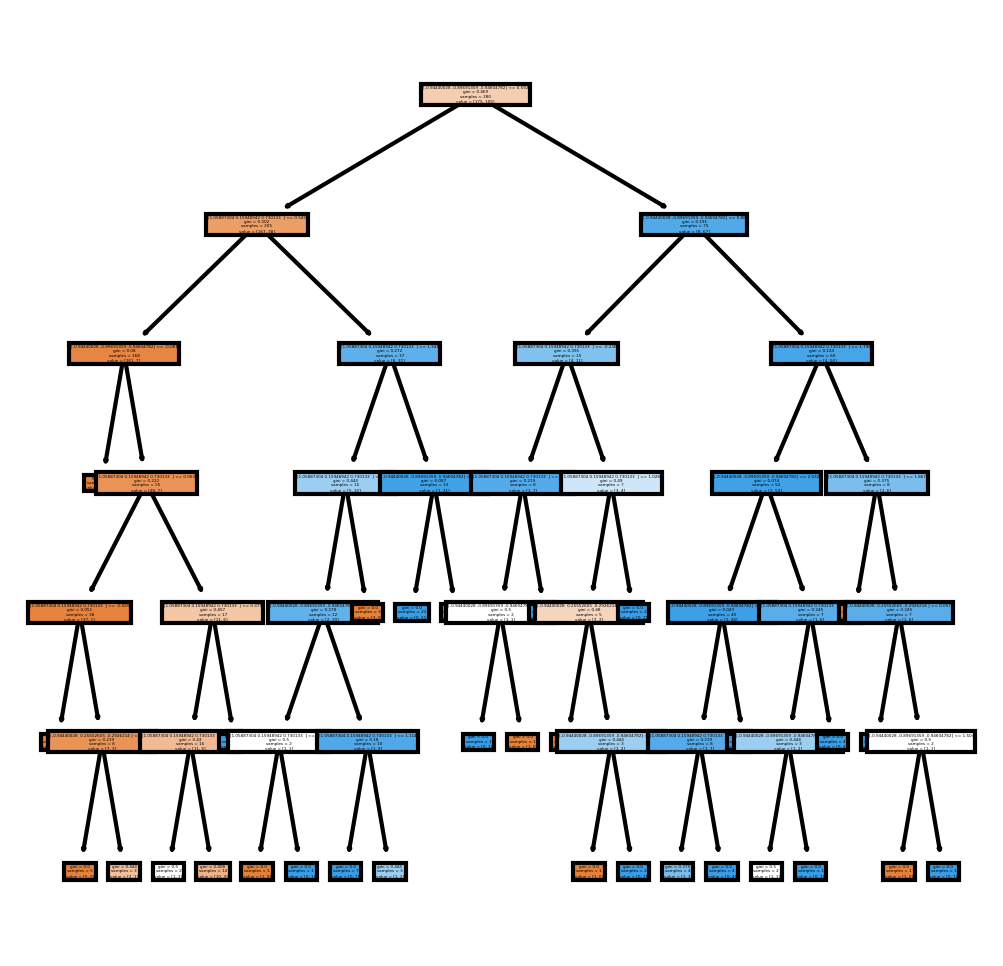

In [22]:

from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtc,feature_names = x_train,filled = True);
fig.savefig('train_tree_imagename.png')
     

**Visualising the Test set results**

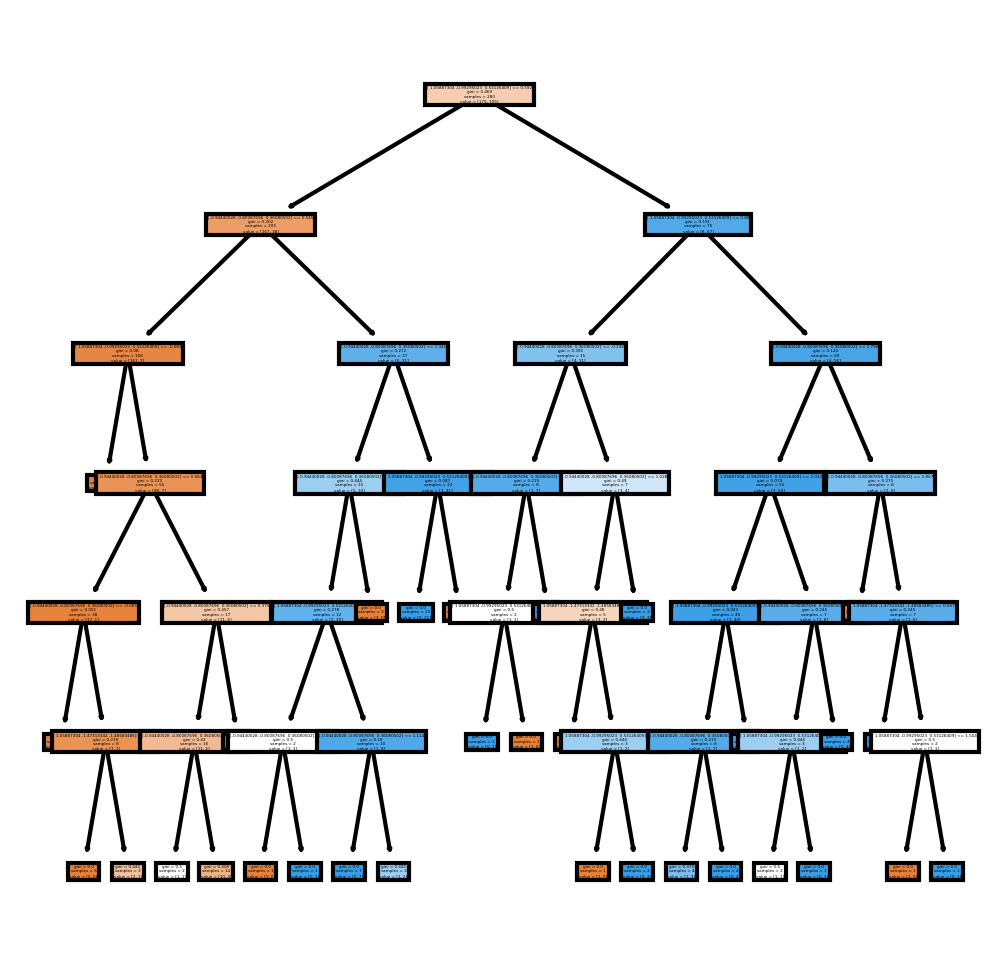

In [23]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtc,feature_names = x_test,filled = True);
fig.savefig('test_tree_imagename.png')